# Bike Sharing Dataset

# Business Problem Understanding

## Context
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

## Problem Statement
Due to the cost to provide the amount of bikes that meets the demand and also do maintenance for long term, it is less effective and inefficient at the same time if we are just gonna put as many bikes as we can on the streets. 

## Goals
Based on the problems that we had, bike sharing systems need some kind of tools that be able to make prediction about how much bikes that we need to provide based on the time and conditions

## Analytic Approach
With that so, we are trying to made an analysis from dataset to discover is there any pattern from the features. we will do it by making regression model so it can output some predictions about how much bikes that will be rented based on the features like season, weather, humidity, temp and many more.

## Metric Evaluation
Evaluation metrics that we'll use for this dataset are `Root Mean Squared Error (RMSE)`, `Mean Absolute Error (MAE)`, `Mean Absolute Percentage Error (MAPE)`, and `R-squared`.
* The Mean absolute error represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.
* The Mean absolute persentage error represents the average absolute percent difference between the values that are fitted by the model and the observed data values.
* Root Mean Squared Error is the square root of Mean Squared error. It measures the standard deviation of residuals.


# Data Understanding
* Dataset contains information about bikes that being rented from 2011 until 2012
* Each records are the representation about the conditions from these rentals system

**Attributes Information**
 
|Feature|Data Type|Description| 
| --- | --- | --- | 
| dteday | object | Date | 
| hum | float64 | Normalized humidity. The values are divided to 100 (max) | 
| weathersit | int64 | (1: Clear, Few clouds, Partly cloudy, Partly cloudy), (2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist), (3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds), (4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) | 
| holiday | int64 | Whether the day is holiday or not | 
| season | int64 | (1:winter, 2:spring, 3:summer, 4:fall) | 
| atemp | float64 | Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (hourly scale) | 
| temp | float64 | Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (hourly scale) 
| hr | int64 | Hour of the day (00:00 AM - 23:00 PM)| 
| casual | int64 | Count of casual users | 
| registered | int64 | Count of registered users | 
| cnt | int64 | Count of total rental bikes including both casual and registered |

In [1]:
# Import Dataset
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
df = pd.read_csv('data_bike_sharing.csv')
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


# Exploratory Data Analysis

In [45]:
df.describe()

,hum,weathersit,holiday,season,atemp,temp,hr,cnt,year,month,day,weekday,working_day
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,189.271023,2011.501932,6.510974,15.642828,3.005261,0.708837
std,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,181.223903,0.500017,3.433995,8.805860,1.992993,0.454317
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.000000
25%,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,40.000000,2011.000000,4.000000,8.000000,1.000000,0.000000
50%,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,142.000000,2012.000000,7.000000,16.000000,3.000000,1.000000
75%,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,282.000000,2012.000000,9.000000,23.000000,5.000000,1.000000
max,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,970.000000,2012.000000,12.000000,31.000000,6.000000,1.000000


In [3]:
# Checking is there any missing values
df.isna().sum()

dteday        0
hum           0
weathersit    0
holiday       0
season        0
atemp         0
temp          0
hr            0
casual        0
registered    0
cnt           0
dtype: int64

In [44]:
# Checking is there any data duplicates
df.duplicated().sum()

0        False
1        False
2        False
3        False
4        False
         ...  
12160    False
12161    False
12162    False
12163    False
12164    False
Length: 12165, dtype: bool

There are no missing values or any duplicated record found from Dataset

In [46]:
# Display columns names, amount of the unique data and samples from each columns
pd.set_option('display.max_colwidth', -1)

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,dteday,731,"[2011-01-01T00:00:00.000000000, 2011-01-02T00:00:00.000000000, 2011-01-03T00:00:00.000000000, 2011-01-04T00:00:00.000000000, 2011-01-05T00:00:00.000000000, 2011-01-06T00:00:00.000000000, 2011-01-07T00:00:00.000000000, 2011-01-08T00:00:00.000000000, 2011-01-09T00:00:00.000000000, 2011-01-10T00:00:00.000000000, 2011-01-11T00:00:00.000000000, 2011-01-12T00:00:00.000000000, 2011-01-13T00:00:00.000000000, 2011-01-14T00:00:00.000000000, 2011-01-15T00:00:00.000000000, 2011-01-16T00:00:00.000000000, 2011-01-17T00:00:00.000000000, 2011-01-18T00:00:00.000000000, 2011-01-19T00:00:00.000000000, 2011-01-20T00:00:00.000000000, 2011-01-21T00:00:00.000000000, 2011-01-22T00:00:00.000000000, 2011-01-23T00:00:00.000000000, 2011-01-24T00:00:00.000000000, 2011-01-25T00:00:00.000000000, 2011-01-26T00:00:00.000000000, 2011-01-27T00:00:00.000000000, 2011-01-28T00:00:00.000000000, 2011-01-29T00:00:00.000000000, 2011-01-30T00:00:00.000000000, 2011-01-31T00:00:00.000000000, 2011-02-01T00:00:00.000000000, 2011-02-02T00:00:00.000000000, 2011-02-03T00:00:00.000000000, 2011-02-04T00:00:00.000000000, 2011-02-05T00:00:00.000000000, 2011-02-06T00:00:00.000000000, 2011-02-07T00:00:00.000000000, 2011-02-08T00:00:00.000000000, 2011-02-09T00:00:00.000000000, 2011-02-10T00:00:00.000000000, 2011-02-11T00:00:00.000000000, 2011-02-12T00:00:00.000000000, 2011-02-13T00:00:00.000000000, 2011-02-14T00:00:00.000000000, 2011-02-15T00:00:00.000000000, 2011-02-16T00:00:00.000000000, 2011-02-17T00:00:00.000000000, 2011-02-18T00:00:00.000000000, 2011-02-19T00:00:00.000000000, 2011-02-20T00:00:00.000000000, 2011-02-21T00:00:00.000000000, 2011-02-22T00:00:00.000000000, 2011-02-23T00:00:00.000000000, 2011-02-24T00:00:00.000000000, 2011-02-25T00:00:00.000000000, 2011-02-26T00:00:00.000000000, 2011-02-27T00:00:00.000000000, 2011-02-28T00:00:00.000000000, 2011-03-01T00:00:00.000000000, 2011-03-02T00:00:00.000000000, 2011-03-03T00:00:00.000000000, 2011-03-04T00:00:00.000000000, 2011-03-05T00:00:00.000000000, 2011-03-06T00:00:00.000000000, 2011-03-07T00:00:00.000000000, 2011-03-08T00:00:00.000000000, 2011-03-09T00:00:00.000000000, 2011-03-10T00:00:00.000000000, 2011-03-11T00:00:00.000000000, 2011-03-12T00:00:00.000000000, 2011-03-13T00:00:00.000000000, 2011-03-14T00:00:00.000000000, 2011-03-15T00:00:00.000000000, 2011-03-16T00:00:00.000000000, 2011-03-17T00:00:00.000000000, 2011-03-18T00:00:00.000000000, 2011-03-19T00:00:00.000000000, 2011-03-20T00:00:00.000000000, 2011-03-21T00:00:00.000000000, 2011-03-22T00:00:00.000000000, 2011-03-23T00:00:00.000000000, 2011-03-24T00:00:00.000000000, 2011-03-25T00:00:00.000000000, 2011-03-26T00:00:00.000000000, 2011-03-27T00:00:00.000000000, 2011-03-28T00:00:00.000000000, 2011-03-29T00:00:00.000000000, 2011-03-30T00:00:00.000000000, 2011-03-31T00:00:00.000000000, 2011-04-01T00:00:00.000000000, 2011-04-02T00:00:00.000000000, 2011-04-03T00:00:00.000000000, 2011-04-04T00:00:00.000000000, 2011-04-05T00:00:00.000000000, 2011-04-06T00:00:00.000000000, 2011-04-07T00:00:00.000000000, 2011-04-08T00:00:00.000000000, 2011-04-09T00:00:00.000000000, 2011-04-10T00:00:00.000000000, ...]"
1,hum,89,"[0.81, 0.8, 0.75, 0.76, 0.72, 0.77, 0.82, 0.88, 0.87, 0.94, 1.0, 0.71, 0.66, 0.57, 0.46, 0.39, 0.47, 0.44, 0.5, 0.43, 0.4, 0.35, 0.3, 0.32, 0.64, 0.69, 0.55, 0.63, 0.68, 0.74, 0.51, 0.56, 0.52, 0.49, 0.48, 0.37, 0.33, 0.28, 0.38, 0.36, 0.59, 0.93, 0.29, 0.42, 0.53, 0.34, 0.54, 0.86, 0.41, 0.45, 0.92, 0.62, 0.58, 0.61, 0.6, 0.65, 0.7, 0.21, 0.25, 0.26, 0.27, 0.31, 0.73, 0.24, 0.22, 0.19, 0.15, 0.67, 0.1, 0.08, 0.12, 0.14, 0.13, 0.17, 0.16, 0.18, 0.96, 0.23, 0.2, 0.85, 0.0, 0.83, 0.78, 0.84, 0.79, 0.89, 0.97, 0.9, 0.91]"
2,weathersit,4,"[1, 2, 3, 4]"
3,holiday,2,"[0, 1]"
4,season,4,"[1, 2, 3, 4]"
5,atemp,65,"[0.2879, 0.2727, 0.3939, 0.3333, 0.4545, 0.4394, 0.4242, 0.4091, 0.3485, 0.2273, 0.197, 0.1364, 0.1212, 0.1667, 0.1818, 0.2121, 0.2424, 0.2576, 0.1515, 0.3182, 0.1061, 0.0606, 0.0758, 0.0909, 0.303, 0.0455, 0.03

In [47]:
# Getting the summary of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   dteday       12165 non-null  datetime64[ns]
 1   hum          12165 non-null  float64       
 2   weathersit   12165 non-null  int64         
 3   holiday      12165 non-null  int64         
 4   season       12165 non-null  int64         
 5   atemp        12165 non-null  float64       
 6   temp         12165 non-null  float64       
 7   hr           12165 non-null  int64         
 8   cnt          12165 non-null  int64         
 9   year         12165 non-null  int64         
 10  month        12165 non-null  int64         
 11  day          12165 non-null  int64         
 12  weekday      12165 non-null  int64         
 13  working_day  12165 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(10)
memory usage: 1.3 MB


As you can see that column `dteday` contain datetime type of data but still assigned as object. So we need to change it

In [7]:
# Changing dtype of dteday from object into datetime64
df['dteday'] = df['dteday'].astype('datetime64')

In [8]:
# dteday column is already being assigned as datetime64
df['dteday']

0       2011-12-09
1       2012-06-17
2       2011-06-15
3       2012-03-31
4       2012-07-31
           ...    
12160   2012-01-25
12161   2012-07-06
12162   2012-02-20
12163   2012-03-31
12164   2011-04-28
Name: dteday, Length: 12165, dtype: datetime64[ns]

We need to sort the data by column `dteday` so it got ascended correctly

In [9]:
# Sort the data based on the datetime
df = df.sort_values(['dteday', 'hr']).reset_index()
df.drop(columns='index', inplace=True)

In [48]:
# dteday column is already being assigned as datetime64
df['dteday']

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
12160   2012-12-31
12161   2012-12-31
12162   2012-12-31
12163   2012-12-31
12164   2012-12-31
Name: dteday, Length: 12165, dtype: datetime64[ns]

Then we are splitting the data of `dteday` so we can get features that we need for models 

In [10]:
# Splitting the data of `dteday` column into separate columns
year = []
month = []
day = []
for i in df["dteday"]:
    year.append(i.year)
    month.append(i.month)
    day.append(i.day)
df["year"] = year
df["month"] = month
df["day"] = day

In [11]:
# create new feature weekday
df['weekday'] = df['dteday'].apply(lambda x: x.weekday())

In [12]:
# create new feature working_day
df['working_day'] = df['weekday'].apply(lambda x: 0 if x > 5 or x == 0 else 1)
df['working_day'] = df[['holiday', 'working_day']].apply(
    lambda x: 0 if x['holiday'] == 1 else x['working_day'], axis=1)

The registered and casual features will be dropped because they are sub-features of the total_cust target label.

In [13]:
# Dropping registered and casual features
df.drop(columns=['registered', 'casual'], inplace=True)

We will do visualize how much the amount of values from each columns

[Text(0, 0, 'Winter'),
 Text(1, 0, 'Spring'),
 Text(2, 0, 'Summer'),
 Text(3, 0, 'Fall')]

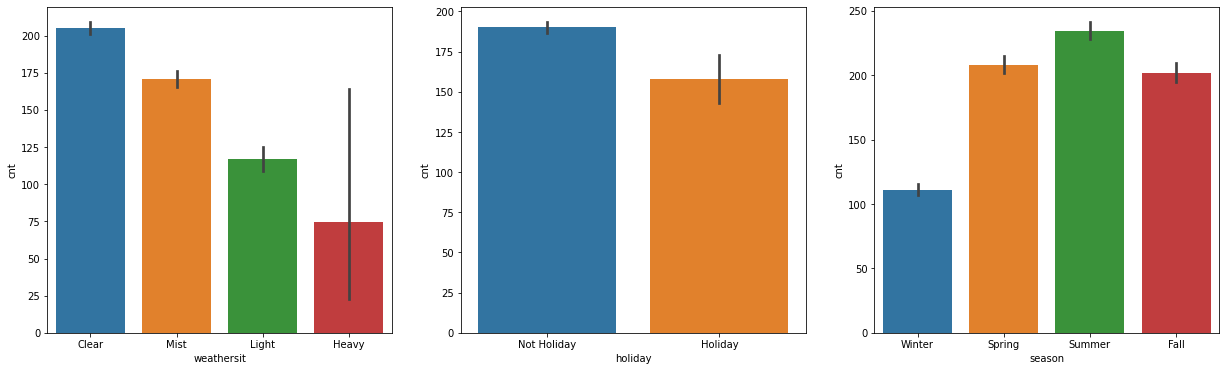

In [14]:
fig, axes = plt.subplots(1,3, figsize=(21, 6))
cnt_wth=sns.barplot(data=df, x="weathersit", y="cnt", ax=axes[0])
cnt_wth.set_xticklabels(['Clear','Mist','Light','Heavy'])
cnt_hday=sns.barplot(data=df, x="holiday", y="cnt", ax=axes[1])
cnt_hday.set_xticklabels(['Not Holiday','Holiday'])
cnt_sns=sns.barplot(data=df, x="season", y="cnt", ax=axes[2])
cnt_sns.set_xticklabels(['Winter','Spring','Summer','Fall'])


From these charts we see that bikes are being rented the most when the weather is clear, the season is summer and it is not holiday. With that so we assumed that these features do effect the amount of bikes that being rented.


We will also do visualize how is the trend within year

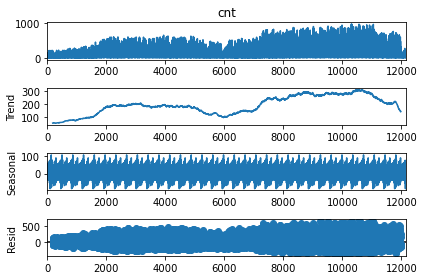

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
series=df['cnt']
result=seasonal_decompose(series,model='addictive',period=365)
result.plot()
plt.show()

From graph above, we could assumed that season being the most affecting feature because the trend goes up on spring (March, April and May), Summer (June, July and August) even Autumn (September, October and November) but goes down significantly on Winter (December, January and February).

In [36]:
import plotly.graph_objects as go
fig=go.Figure([go.Scatter(name='true',x=df['dteday'],y=df['cnt'])])
fig.update_xaxes(rangeslider_visible=True)
fig.show()

The trend of the amount of bikes that being rented from 2011 and 2012 relatively the same. it goes up on April until October and then gradually decreasing until around January to February

Then we  check is there any multicollinearity from each columns

In [16]:
# Making a def function to check for multicollinearity from columns
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [17]:
# Checking for multicollinearity from each columns
calc_vif(df.drop(columns=['cnt','dteday']))

,variables,VIF
0,hum,16.214353
1,weathersit,7.460041
2,holiday,1.166845
3,season,20.892781
4,atemp,354.344300
5,temp,312.504533
6,hr,4.225367
7,year,37.934085
8,month,14.842581
9,day,4.174387


There are some features that have relatively high values of vif that represents multicollinearity. However, Multicollinearity may not be a problem in forecasting but it will be a problem in simulation so we used as many features.

Text(0.5, 1.0, 'Correlation Matrix')

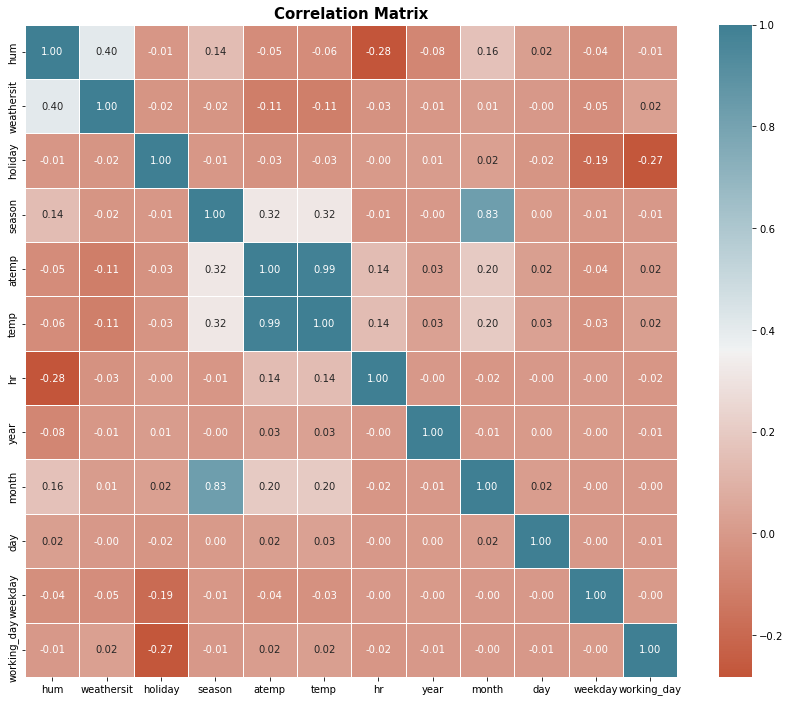

In [18]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df.drop(columns=['cnt','dteday']).corr("spearman")
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold')

As we can see that there are some columns that had high correlation with other columns, But it is common to see that kind of correlation in a time series dataset.
however, I wanted to keep these features as they may still be useful for the model

## Modelling

In [20]:
from scipy.stats import randint, uniform
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, TimeSeriesSplit
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor

In [21]:
# Transform every categorical columns into numerical
transformer = ColumnTransformer([("onehot", OneHotEncoder(drop='first', handle_unknown='ignore'), ['season','year','month','day','weathersit','weekday','working_day']),
],remainder='passthrough')

In [22]:
# Seperate the independent variable from the target
x = df.drop(columns=['cnt','dteday'])
y = df['cnt']

In [23]:
# Splitting dataset for model testing and training
df_train=df[(df['year']==2011)].copy()
x_train=df_train.drop(columns=['cnt','dteday'])
y_train=df_train['cnt']

df_test=df[(df['year']==2012)].copy()
x_test=df_train.drop(columns=['cnt','dteday'])
y_test=df_train['cnt']

In [24]:
# Checking if our transform fit correctly or not
transformer.fit_transform(x)

<12165x60 sparse matrix of type '<class 'numpy.float64'>'
	with 109824 stored elements in Compressed Sparse Row format>

we need to ensure that we do not introduce randomness. 
The time series needs to be continuous and in order. We cannot be randomly splitting our data into train and test sets. Rather, we should use TimeSeriesSplit to avoid that we predict the target with information that we would not have been able to know at the time of the forecast.

Furthermore, when using bagging or bootstrapping algorithms, such as random forests and XGBoost, ensure that you actually don’t bootstrap because this would again introduce randomness and look-ahead bias into our prediction (XGBoost by default does not bootstrap, while random forests does).

In [25]:
# Define what algorithm that we'll use
lg = LinearRegression(n_jobs=-1)
rd = Ridge(max_iter=1000, random_state=10)
ls = Lasso(max_iter=1000, random_state=10)
rf = RandomForestRegressor(bootstrap=False,random_state=10,n_jobs=-1)
xgb = XGBRegressor(random_state=10,n_jobs=-1)
ada = AdaBoostRegressor(random_state=10, base_estimator=DecisionTreeRegressor())


# List of models
models = [lg, rd, ls, rf, xgb, ada]

score_rmse = []
mean_rmse = []
std_rmse = []

score_mae = []
mean_mae = []
std_mae = []

score_mape = []
mean_mape = []
std_mape = []

# Make a loop to find the best algorithm
for i in models:
    
    crossval = TimeSeriesSplit(n_splits=5)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    mean_rmse.append(model_cv_rmse.mean())
    std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    mean_mae.append(model_cv_mae.mean())
    std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    mean_mape.append(model_cv_mape.mean())
    std_mape.append(model_cv_mape.std())

[ -98.31146948 -133.12891438 -124.37989609 -135.50437412 -102.82743518] LinearRegression(n_jobs=-1)
[ -70.07739147 -103.74011258  -98.53021569  -96.72246123  -70.45703802] LinearRegression(n_jobs=-1)
[-3.37259288 -3.35974274 -3.01340317 -2.09609108 -1.85670873] LinearRegression(n_jobs=-1)
[-101.13602735 -133.48002942 -124.77431902 -140.58330889 -101.54481561] Ridge(max_iter=1000, random_state=10)
[ -69.77882517 -103.13649126  -98.68678353  -97.60694459  -70.27952538] Ridge(max_iter=1000, random_state=10)
[-2.93747357 -3.24326611 -3.00005347 -1.60568726 -1.9453123 ] Ridge(max_iter=1000, random_state=10)
[-115.45563112 -136.41360666 -123.68529691 -137.29972839 -100.31544169] Lasso(random_state=10)
[ -76.71733113 -101.64777317  -98.98487587  -96.8588209   -70.70010267] Lasso(random_state=10)
[-2.04662451 -2.93039301 -3.16459397 -1.85944309 -2.10832103] Lasso(random_state=10)
[-92.41552379 -93.59084448 -66.03745416 -81.88554821 -75.60885526] RandomForestRegressor(bootstrap=False, n_jobs=-1

In [26]:
# Evaluating the results from the models that we chose
pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge', 'Lasso','Random Forest','XGboost', 'Adaboost'],
    'Mean_RMSE': mean_rmse,
    'Std_RMSE': std_rmse,
    'Mean_MAE': mean_mae,
    'Std_MAE': std_mae,
    'Mean_MAPE': mean_mape,
    'Std_MAPE': std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-118.830418,15.429758,-87.905444,14.585257,-2.739708,0.640910
1,Ridge,-120.303700,16.273660,-87.897714,14.707741,-2.546359,0.646623
2,Lasso,-122.633941,13.825436,-88.981781,12.705696,-2.421875,0.522624
3,Random Forest,-81.907645,10.377388,-52.147891,8.281113,-0.502724,0.085667
4,XGboost,-68.682090,8.684357,-46.750436,7.758526,-0.705111,0.181716
5,Adaboost,-73.701192,10.840170,-47.065411,8.627394,-0.539735,0.166827


There are pretty significant difference between RMSE and MAE, where the value of RMSE is higher cause by it gives more importance to the highest errors, hence it is more sensitive to outliers whereas on the other hand MAE is more robust to outliers.

Based on all of metric evaluations, XGboost is being the best model with the least value on `RMSE`, `MAE` and `MAPE` also.


We'll do run the xgboost model with default hyperparameter and predict to data test.

In [27]:
score_rmse = []
score_mae = []
score_mape = []

# Model XGB
model = {'xgb': XGBRegressor(random_state=10)}

# Then predict to Datatest
xgb_model = Pipeline([
    ('preprocessing', transformer),
    ('model', XGBRegressor(random_state=10,n_jobs=-1))
    ])

xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)
score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
score_mae.append(mean_absolute_error(y_test, y_pred))
score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=model.keys())
score_before_tuning

,RMSE,MAE,MAPE
xgb,17.426278,11.910838,0.29008


## Hyperparameter Tuning

In [28]:
# Display all the params from our estimator
estimator.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehot',
                                    OneHotEncoder(drop='first',
                                                  handle_unknown='ignore'),
                                    ['season', 'year', 'month', 'day',
                                     'weathersit', 'weekday', 'working_day'])])),
  ('model',
   AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), random_state=10))],
 'verbose': False,
 'preprocessing': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehot',
                                  OneHotEncoder(drop='first',
                                                handle_unknown='ignore'),
                                  ['season', 'year', 'month', 'day',
                                   'weathersit', 'weekday', 'working_day'])]),
 'model': AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), 

In [29]:
# Model that being hyperparamter tuned
xgb = XGBRegressor(random_state=10)

# Algorithm chains
estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

crossval = TimeSeriesSplit(n_splits=5)

hyperparam_space={'model__eta':[0.1, 0.3, 0.5, 0.7, 0.9],
                  'model__max_depth':[10, 100, 1000, 10000]
}

# Find the best parameters to get the best scores using randomized search
randomized = RandomizedSearchCV(
    estimator, 
    param_distributions = hyperparam_space,
    n_iter = 20,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error',
    random_state = 1  
)

randomized.fit(x_train, y_train)

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['season',
                                                                                'year',
                                                                                'month',
                                                                                'day',
                                                                                'weathersit',
                                                                                'weekday',
                                                                                'working_day'])])),
                                             ('model',
                                              XGBRegressor(bas...
                                                           n_estimators=100,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           predictor=None,
                                                           random_state=10, ...))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__eta': [0.1, 0.3, 0.5, 0.7, 0.9],
                                        'model__max_depth': [10, 100, 1000,
                                                             10000]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [30]:
pd.DataFrame(randomized.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__eta,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
4,0.981367,0.269035,0.030228,0.009671,10,0.3,"{'model__max_depth': 10, 'model__eta': 0.3}",-81.888605,-74.512915,-54.222519,...,6.562197,1,-0.579903,-0.710466,-0.454305,-0.370388,-0.656715,-0.554355,0.125980,2
0,1.186079,0.527164,0.042038,0.013606,10,0.1,"{'model__max_depth': 10, 'model__eta': 0.1}",-85.450049,-76.110630,-54.367923,...,7.136337,2,-0.573527,-0.768250,-0.397147,-0.369573,-0.645070,-0.550713,0.150426,1
5,1.556484,0.701529,0.025423,0.004033,100,0.3,"{'model__max_depth': 100, 'model__eta': 0.3}",-82.626208,-75.896515,-59.035980,...,6.602761,3,-0.592894,-0.787735,-0.417915,-0.391393,-0.758278,-0.589643,0.165216,12
6,1.513977,0.865213,0.026424,0.010920,1000,0.3,"{'model__max_depth': 1000, 'model__eta': 0.3}",-82.626208,-75.896515,-59.035980,...,6.602761,3,-0.592894,-0.787735,-0.417915,-0.391393,-0.758278,-0.589643,0.165216,12
7,1.507772,0.865003,0.024222,0.006183,10000,0.3,"{'model__max_depth': 10000, 'model__eta': 0.3}",-82.626208,-75.896515,-59.035980,...,6.602761,3,-0.592894,-0.787735,-0.417915,-0.391393,-0.758278,-0.589643,0.165216,12


In [31]:
# Print the best parameters that output the best score
print('XGBoost')
print('Best_score:', randomized.best_score_)
print('Best_params:', randomized.best_params_)

XGBoost
Best_score: -68.89831409978196
Best_params: {'model__max_depth': 10, 'model__eta': 0.3}


In [32]:
# Model XGB
model = {'xgb': XGBRegressor(random_state=10)}

# Define model terhadap estimator terbaik
xgb_tuning = randomized.best_estimator_

# Fitting model
xgb_tuning.fit(x_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(x_test)

# Print the values of metrics from RMSE, MAE & MAPE after being tuned
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
xgb
score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
xgb,3.007514,2.0082,0.053478


In [33]:
score_before_tuning

,RMSE,MAE,MAPE
xgb,17.426278,11.910838,0.29008


In [34]:
score_after_tuning

,RMSE,MAE,MAPE
xgb,3.007514,2.0082,0.053478


As we can see that the models get a pretty bumped up of performance that being representated by the reduced values of all metric evaluations.
* RMSE, MAE & MAPE before being tuned: 17.42, 11.91, 0.290
* RMSE, MAE & MAPE after being tuned: 3.007, 2.008, 0.053

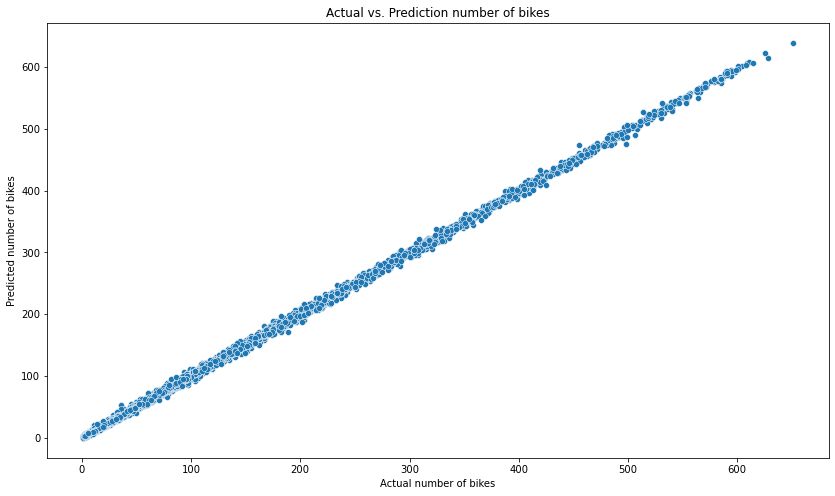

In [35]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction number of bikes', 
                                               xlabel='Actual number of bikes', 
                                               ylabel='Predicted number of bikes')

<AxesSubplot:title={'center':'Feature Importances'}>

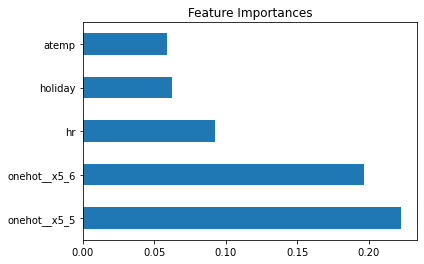

In [39]:
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances')

# Conclusion
XGBoost is the best performing model out of the six models and is more robust against overfitting and noise. However, it seems like because of the lack amount of data cause a terribly score on data train than on test score (MAPE 0.75 for train score and MAPE 0.05 for test score). 

It usually indicates that there are some differences between the kind of data that trained the model on and the testing data that provided for evaluation. When the data being splitted, Data train contain data from 2011 only and being 'splitted' again by cross validation process so it scores terribly on train score while on data test, it used all the data from 2011 to predict data from 2012       

Spending more time on feature selection and engineering and also adding more data can leads to better result.


# Recommendation
* Adding the amount of data, especially for an annual cycle so that the data train could become larger and the prediction become more accurate eventually
* Adding more features contain of data that can also be represent or contribute to the amount of bikes that being rented from days to days.
* Making some kind of systems that can make customer to be able to rent the bike from days before, so that the amount of bikes that being placed on each stations can be adjusted by the reservation system also.

# Save Model

In [40]:
import pickle

In [41]:
# Import Dataset
# import seaborn as sns
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# import warnings
# warnings.filterwarnings('ignore')
# from statsmodels.tsa.seasonal import seasonal_decompose
# from scipy.stats import randint, uniform
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.model_selection import cross_val_score, RandomizedSearchCV, TimeSeriesSplit
# from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
# from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
# from sklearn.tree import DecisionTreeRegressor
# from xgboost.sklearn import XGBRegressor

# # Preprocessing
# df['dteday'] = df['dteday'].astype('datetime64')

# df = df.sort_values(['dteday', 'hr']).reset_index()
# df.drop(columns='index', inplace=True)

# year = []
# month = []
# day = []
# for i in df["dteday"]:
#     year.append(i.year)
#     month.append(i.month)
#     day.append(i.day)
# df["year"] = year
# df["month"] = month
# df["day"] = day

# df['weekday'] = df['dteday'].apply(lambda x: x.weekday())

# df['working_day'] = df['weekday'].apply(lambda x: 0 if x > 5 or x == 0 else 1)
# df['working_day'] = df[['holiday', 'working_day']].apply(
#     lambda x: 0 if x['holiday'] == 1 else x['working_day'], axis=1)

# df.drop(columns=['registered', 'casual'], inplace=True)

# Modeling
# transformer = ColumnTransformer([("onehot", OneHotEncoder(drop='first', handle_unknown='ignore'), ['season','year','month','day','weathersit','weekday','working_day']),
# ],remainder='passthrough')

# x = df.drop(columns=['cnt','dteday'])
# y = df['cnt']

# xgb = XGBRegressor(n_jobs=-1, eta= 0.3, max_depth= 10)

# estimator = Pipeline([
#         ('preprocessing', transformer),
#         ('model', xgb)
#         ])


# estimator.fit(x, y)

# pickle.dump(estimator, open("model_bike_sharing.sav", "wb"))




In [50]:
# Load Model
# loaded_model = pickle.load(open("model_bike_sharing.sav", "rb"))
# mean_absolute_percentage_error(y, loaded_model.predict(x))



0.08534832022119776